In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.collab import *
from fastai.tabular import *

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
torch.backends.cudnn.enabled

True

# Collarborative filtering example

In [4]:
user, item, title = 'userId', 'movieId', 'title'

In [5]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/home/luan/.fastai/data/movie_lens_sample')

In [6]:
path.ls()

[PosixPath('/home/luan/.fastai/data/movie_lens_sample/ratings.csv')]

In [7]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [8]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [9]:
y_range = [0, 5.5]

In [10]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [11]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.609264,0.922423,00:00
1,0.849644,0.678422,00:00
2,0.656378,0.668428,00:00


# New dataset: Movielens 100k

http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [13]:
path = Config.data_path()/'ml-100k'
path

PosixPath('/home/luan/.fastai/data/ml-100k')

In [14]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
movies.columns

Index(['movieId', 'title', 'date', 'N', 'url', 'g0', 'g1', 'g2', 'g3', 'g4',
       'g5', 'g6', 'g7', 'g8', 'g9', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15',
       'g16', 'g17', 'g18'],
      dtype='object')

In [17]:
len(ratings)

100000

In [18]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()  # Got title?

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [19]:
rating_movie[rating_movie.userId == 154].head()  # For 1 userId. 

,userId,movieId,rating,timestamp,title
3,154,242,3,879138235,Kolya (1996)
128,154,302,4,879138235,L.A. Confidential (1997)
681,154,474,5,879138783,Dr. Strangelove or: How I Learned to Stop Worr...
2080,154,222,2,879138910,Star Trek: First Contact (1996)
9077,154,143,3,879139003,"Sound of Music, The (1965)"


In [20]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [21]:
data.show_batch()

userId,title,target
551,Batman (1989),3.0
450,Cape Fear (1991),4.0
92,Private Parts (1997),4.0
654,"Fish Called Wanda, A (1988)",4.0
671,Star Wars (1977),5.0


In [22]:
data.batch_size

64

In [35]:
data

TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userId 196; title Kolya (1996); ,userId 63; title Kolya (1996); ,userId 226; title Kolya (1996); ,userId 154; title Kolya (1996); ,userId 306; title Kolya (1996); 
y: FloatList
3.0,3.0,5.0,3.0,5.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userId 498; title Casino (1995); ,userId 642; title Pocahontas (1995); ,userId 58; title 2001: A Space Odyssey (1968); ,userId 495; title Cat People (1982); ,userId 618; title Philadelphia (1993); 
y: FloatList
3.0,5.0,4.0,3.0,3.0
Path: .;

Test: None

In [23]:
y_range = [0,5.5]
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


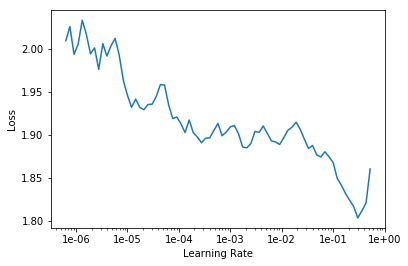

In [24]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [25]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.962078,0.940111,00:03
1,0.858546,0.880728,00:03
2,0.767471,0.834896,00:04
3,0.656606,0.814134,00:03
4,0.548445,0.813016,00:03


In [26]:
learn.save('dotprod')

# Interpretation

In [ ]:
learn.load('dotprod')

In [27]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [28]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]  # Best 10 movies

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [30]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [31]:
movie_bias   # bias from the embedding :D

tensor([ 5.5723e-01,  4.2705e-01,  3.8498e-01,  3.8811e-01,  9.6242e-02,
         1.5341e-01,  2.2065e-01,  3.2828e-01,  3.0186e-01,  1.4565e-01,
         4.5149e-01,  4.6050e-01,  3.1948e-01,  2.8108e-01,  5.1236e-01,
         2.2791e-01,  1.5039e-01,  2.5294e-01,  3.9375e-01,  2.3893e-01,
         2.5704e-01,  5.7790e-01,  1.2556e-01,  4.3290e-01,  3.2697e-01,
         1.3322e-01,  3.9105e-01,  2.2889e-01,  3.2606e-01,  4.4419e-02,
         3.6824e-01,  2.2240e-01,  3.4013e-01,  1.9687e-01,  2.3364e-01,
         6.3921e-01,  1.6606e-01,  3.3721e-01,  5.3591e-01,  3.5155e-01,
         1.7698e-01,  2.2162e-01,  1.1575e-01,  3.1820e-02,  3.4662e-01,
         2.7014e-01,  2.7606e-01,  5.5800e-01,  2.1966e-01,  1.8477e-01,
         3.7530e-01,  3.9593e-01,  3.8914e-01,  1.2653e-01,  3.2376e-01,
         2.3941e-01,  4.8631e-01,  4.5320e-01,  2.2741e-01,  2.0411e-01,
        -4.2929e-02,  2.0106e-01,  2.5151e-01, -2.7400e-02,  2.3340e-01,
         1.6148e-01,  2.8846e-01,  3.1495e-01,  2.0

In [32]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [33]:
mean_ratings

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [34]:
item0 = lambda o:o[0]

In [39]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3506),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2863),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2755), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2682), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2649), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2493), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2462), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2405), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2298), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2294), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2244), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2216), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2213), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2198), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2154), 'Spee

In [38]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]   # Why sort by tensor????

[(tensor(0.6392), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5779), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5580), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5572), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5359), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5180), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5143), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.5124), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5063), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4972), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4909), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4863), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4811), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4755), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4605), 'Godfather, The (1972)', 4.283292978208232)]

# Movie weights

In [40]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [41]:
movie_pca = movie_w.pca(3)   # Easy use of pca? :D
movie_pca.shape

torch.Size([1000, 3])

In [42]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [43]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2651), 'Jungle2Jungle (1997)'),
 (tensor(1.1815), "McHale's Navy (1997)"),
 (tensor(1.1513), 'Leave It to Beaver (1997)'),
 (tensor(1.1435), 'Bio-Dome (1996)'),
 (tensor(1.1423), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.1324), 'Home Alone 3 (1997)'),
 (tensor(1.1100), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.0773), 'Congo (1995)'),
 (tensor(1.0465), 'Flipper (1996)'),
 (tensor(1.0371), 'Mortal Kombat: Annihilation (1997)')]

In [44]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1549), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0780), 'Chinatown (1974)'),
 (tensor(-1.0680), 'Casablanca (1942)'),
 (tensor(-1.0624), 'Close Shave, A (1995)'),
 (tensor(-1.0190), 'Lawrence of Arabia (1962)'),
 (tensor(-1.0155), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(-0.9779), 'Ran (1985)'),
 (tensor(-0.9719), 'Godfather, The (1972)'),
 (tensor(-0.9413), 'When We Were Kings (1996)'),
 (tensor(-0.9294),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)')]

In [45]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [46]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.8745), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8187), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7754), 'Stupids, The (1996)'),
 (tensor(0.7479), 'Keys to Tulsa (1997)'),
 (tensor(0.7397), 'Big Night (1996)'),
 (tensor(0.7367), 'Jude (1996)'),
 (tensor(0.7335), 'Cable Guy, The (1996)'),
 (tensor(0.7270), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.7253), 'Trainspotting (1996)'),
 (tensor(0.7148), 'Very Brady Sequel, A (1996)')]

In [47]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1309), 'Braveheart (1995)'),
 (tensor(-1.0764), 'Titanic (1997)'),
 (tensor(-1.0587), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.8900), 'Independence Day (ID4) (1996)'),
 (tensor(-0.8657), 'Forrest Gump (1994)'),
 (tensor(-0.8475), 'Air Force One (1997)'),
 (tensor(-0.8307), 'American President, The (1995)'),
 (tensor(-0.8223), 'Back to the Future (1985)'),
 (tensor(-0.8135), 'Hunt for Red October, The (1990)'),
 (tensor(-0.8124), 'Top Gun (1986)')]

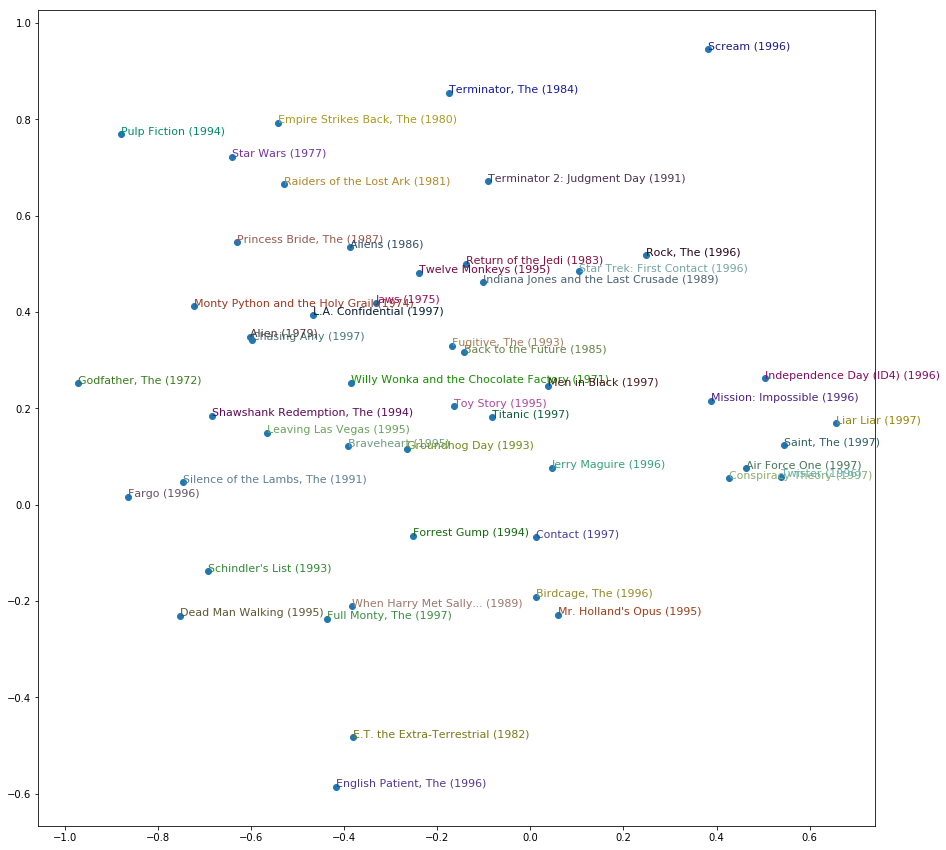

In [48]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()